In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from subprocess import call

In [2]:
wine_data = datasets.load_wine()
ds = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)
print(f"#examples :{ds.shape[0]} and #features: {ds.shape[1]}")

#examples :178 and #features: 13


In [3]:
print(ds.head())
print("\n\nFeatures:", wine_data.feature_names)
print("\nLabels:", np.unique(wine_data.target_names))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [4]:
x_train, x_test, y_train, y_test = train_test_split(wine_data.data, wine_data.target, test_size = 0.20, random_state = 12)

In [5]:
#creating instance of classifier and performing training
dtclassifier = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 10)
dtclassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [6]:
# Testing
y_prediction = dtclassifier.predict(x_test)

#  Accuracy
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:\n", accuracy)

#  Confusion Matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("\nConfusion Matrix:\n",c_matrix)

#  Precision
precision = precision_score(y_test, y_prediction, average=None)
print("\nPrecision Score:\n", precision)

#  Recall
recall = recall_score(y_test, y_prediction, average=None)
print("\nRecall Score:\n", recall)

Accuracy Score:
 0.8611111111111112

Confusion Matrix:
 [[12  2  0]
 [ 1 10  0]
 [ 2  0  9]]

Precision Score:
 [0.8        0.83333333 1.        ]

Recall Score:
 [0.85714286 0.90909091 0.81818182]


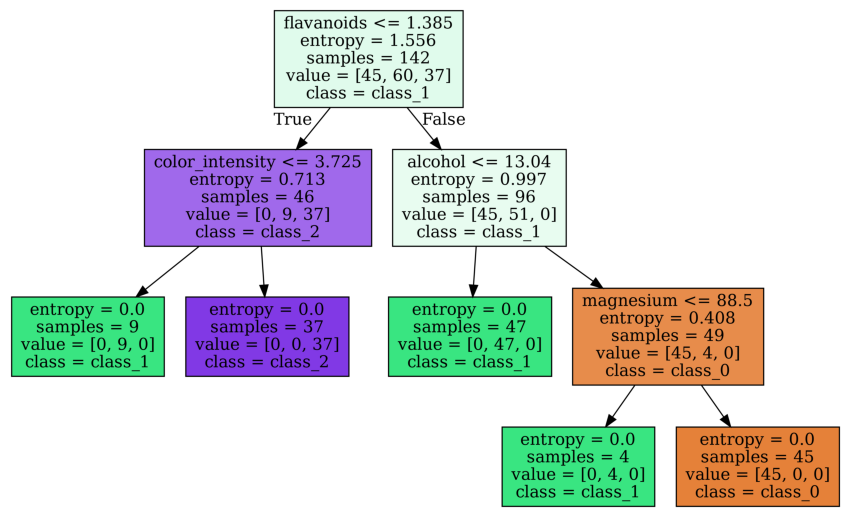

In [7]:
export_graphviz(dtclassifier, out_file='wine_tree.dot',
                feature_names=list(wine_data.feature_names),
               class_names=list(wine_data.target_names),
                filled=True)

# Convert to png
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])
plt.figure(figsize = (15, 20))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()